# Hotel Booking Cancellation Prediction - Classification Problem

--------------------------------
## Context
-------------------------------

A significant number of hotel bookings are called off due to cancellations or no-shows. The typical reasons for cancellations include changes of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers' booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings potentially impacts a hotel on various fronts:
1. Loss of resources (revenue) when the hotel cannot resell the room.
2. Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
3. Lowering prices at last minute, so the hotel can resell a room, resulting in reducing the profit margin.
4. Human resources to make arrangements for the guests.

----------------------------
## Objective
----------------------------- 

The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting **which booking is likely to be canceled**. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You, as a data scientist, have to analyze the data provided to find which **factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.**


--------------------------
## Data Description
--------------------------

The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: The unique identifier of each booking

* no_of_adults: The number of adults

* no_of_children: The number of children

* no_of_weekend_nights: The number of weekend nights (Saturday and Sunday) the guest stayed or booked to stay at the hotel

* no_of_week_nights: The number of weeknights (Monday to Friday) the guest stayed or booked to stay at the hotel

* type_of_meal_plan: The type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)

* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)

* room_type_reserved: The type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.

* lead_time: The number of days between the date of booking and the arrival date

* arrival_year: The year of arrival date

* arrival_month: The month of arrival date

* arrival_date: The date of the month

* market_segment_type: Market segment designation.

* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)

* no_of_previous_cancellations: The number of previous bookings that were canceled by the customer before the current booking

* no_of_previous_bookings_not_canceled: The number of previous bookings not canceled by the customer before the current booking

* avg_price_per_room: The average price per day for the reservation; prices of the rooms are dynamic. (in euros)

* no_of_special_requests: The total number of special requests made by the customer (e.g. high floor, view from the room, etc.)

* booking_status: Flag indicating if the booking was canceled or not. The class 0 represents the Not_Canceled whereas class 1 represents the Canceled label.

# Loading the Data and have a first informative look

In [42]:
# Importing crucial libraries to load, manipulate and visualize the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [43]:
# Loading the data
file = 'INNHotelsGroup.csv'
df = pd.read_csv(file)
data = df.copy() # creating a copy as a overall backup
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [3]:
# Data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [4]:
data.duplicated().sum() # are there any duplicates in the dataset

0

In [5]:
data.isnull().sum() # another way of looking at a datset and find missing values

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [6]:
data.describe(include=[np.number]).T # first stats for our numerical variables

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


**Observations**:
- We see max numbers of children equals to 10 which looks prety unusual. We hav to check this
- We see min average price per room equals to 0. We have to further explore this if the hotel gives some free rooms to its clients


In [7]:
data.describe(include=[object]).T # looking at none numerical values

,count,unique,top,freq
Booking_ID,36275,36275,INN00001,1
type_of_meal_plan,36275,4,Meal Plan 1,27835
room_type_reserved,36275,7,Room_Type 1,28130
market_segment_type,36275,5,Online,23214
booking_status,36275,2,Not_Canceled,24390


**Observations**:
- We see that our dataset is imbalanced. We have much more Not_Canceled status the Canceled status
- We see that the features Booking_ID gives us no relevant edge for our classification model since we have 36.275 unique values in a 36.275 big dataset

In [8]:
# Another way of encoding the categorical features could be developed in such a way
cat_features = data.select_dtypes(include=['object']).columns.tolist() # creating a list of all object columns

for c in cat_features:
    print(data[c].value_counts(1)) # using the 1 is nothing else then a shortcut for normalize=True, relative frequency
    print('-'*50)


Booking_ID
INN00001    0.000028
INN24187    0.000028
INN24181    0.000028
INN24182    0.000028
INN24183    0.000028
              ...   
INN12086    0.000028
INN12085    0.000028
INN12084    0.000028
INN12083    0.000028
INN36275    0.000028
Name: proportion, Length: 36275, dtype: float64
--------------------------------------------------
type_of_meal_plan
Meal Plan 1     0.767333
Not Selected    0.141420
Meal Plan 2     0.091110
Meal Plan 3     0.000138
Name: proportion, dtype: float64
--------------------------------------------------
room_type_reserved
Room_Type 1    0.775465
Room_Type 4    0.166975
Room_Type 6    0.026630
Room_Type 2    0.019076
Room_Type 5    0.007305
Room_Type 7    0.004356
Room_Type 3    0.000193
Name: proportion, dtype: float64
--------------------------------------------------
market_segment_type
Online           0.639945
Offline          0.290227
Corporate        0.055603
Complementary    0.010779
Aviation         0.003446
Name: proportion, dtype: float64
---

In [9]:
# So let us have a look on the no_of_children feature
no_of_children = data['no_of_children'].value_counts(normalize=True)
no_of_children

no_of_children
0     0.925624
1     0.044604
2     0.029166
3     0.000524
9     0.000055
10    0.000028
Name: proportion, dtype: float64

**Since we do not really beliefe in the situation that there are 9 or 10 kids we more or less think of a dataset mistake. We will replace 9 and 10 with 3 kids**.

In [10]:
data["no_of_children"] = data["no_of_children"].replace([9, 10], 3)
no_of_children = data['no_of_children'].value_counts(normalize=True)
no_of_children

no_of_children
0    0.925624
1    0.044604
2    0.029166
3    0.000606
Name: proportion, dtype: float64

**Now lets have a deeper look into the avg_price_per_room feature since we saw, that there are rooms without any price**

In [11]:
data[data["avg_price_per_room"] == 0]

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
63,INN00064,1,0,0,1,Meal Plan 1,0,Room_Type 1,2,2017,9,10,Complementary,0,0,0,0.0,1,Not_Canceled
145,INN00146,1,0,0,2,Meal Plan 1,0,Room_Type 1,13,2018,6,1,Complementary,1,3,5,0.0,1,Not_Canceled
209,INN00210,1,0,0,0,Meal Plan 1,0,Room_Type 1,4,2018,2,27,Complementary,0,0,0,0.0,1,Not_Canceled
266,INN00267,1,0,0,2,Meal Plan 1,0,Room_Type 1,1,2017,8,12,Complementary,1,0,1,0.0,1,Not_Canceled
267,INN00268,1,0,2,1,Meal Plan 1,0,Room_Type 1,4,2017,8,23,Complementary,0,0,0,0.0,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35983,INN35984,1,0,0,1,Meal Plan 1,0,Room_Type 7,0,2018,6,7,Complementary,1,4,17,0.0,1,Not_Canceled
36080,INN36081,1,0,1,1,Meal Plan 1,0,Room_Type 7,0,2018,3,21,Complementary,1,3,15,0.0,1,Not_Canceled
36114,INN36115,1,0,0,1,Meal Plan 1,0,Room_Type 1,1,2018,3,2,Online,0,0,0,0.0,0,Not_Canceled
36217,INN36218,2,0,2,1,Meal Plan 1,0,Room_Type 2,3,2017,8,9,Online,0,0,0,0.0,2,Not_Canceled


- In the market segment column, it looks like **many values are complementary**. Let's check the market segment where the room prices are equal to 0.

In [12]:
data.loc[data["avg_price_per_room"] == 0, "market_segment_type"].value_counts()

market_segment_type
Complementary    354
Online           191
Name: count, dtype: int64

**Observations:**

* It makes sense that most values with room prices equal to 0 are the rooms given as a complimentary service by the hotel.
* The rooms booked online might be a part of some promotional campaign done by the hotel. We will not treat these rows as we don't have the data to test this claim.

**Since we dont want our Booking_ID Feature we have to drop it**

In [13]:
data = data.drop(['Booking_ID'], axis='columns') # axis could also set to be = 1; that's the same

# Explorative Data Analysis and Visualization

## Univariate Analysis

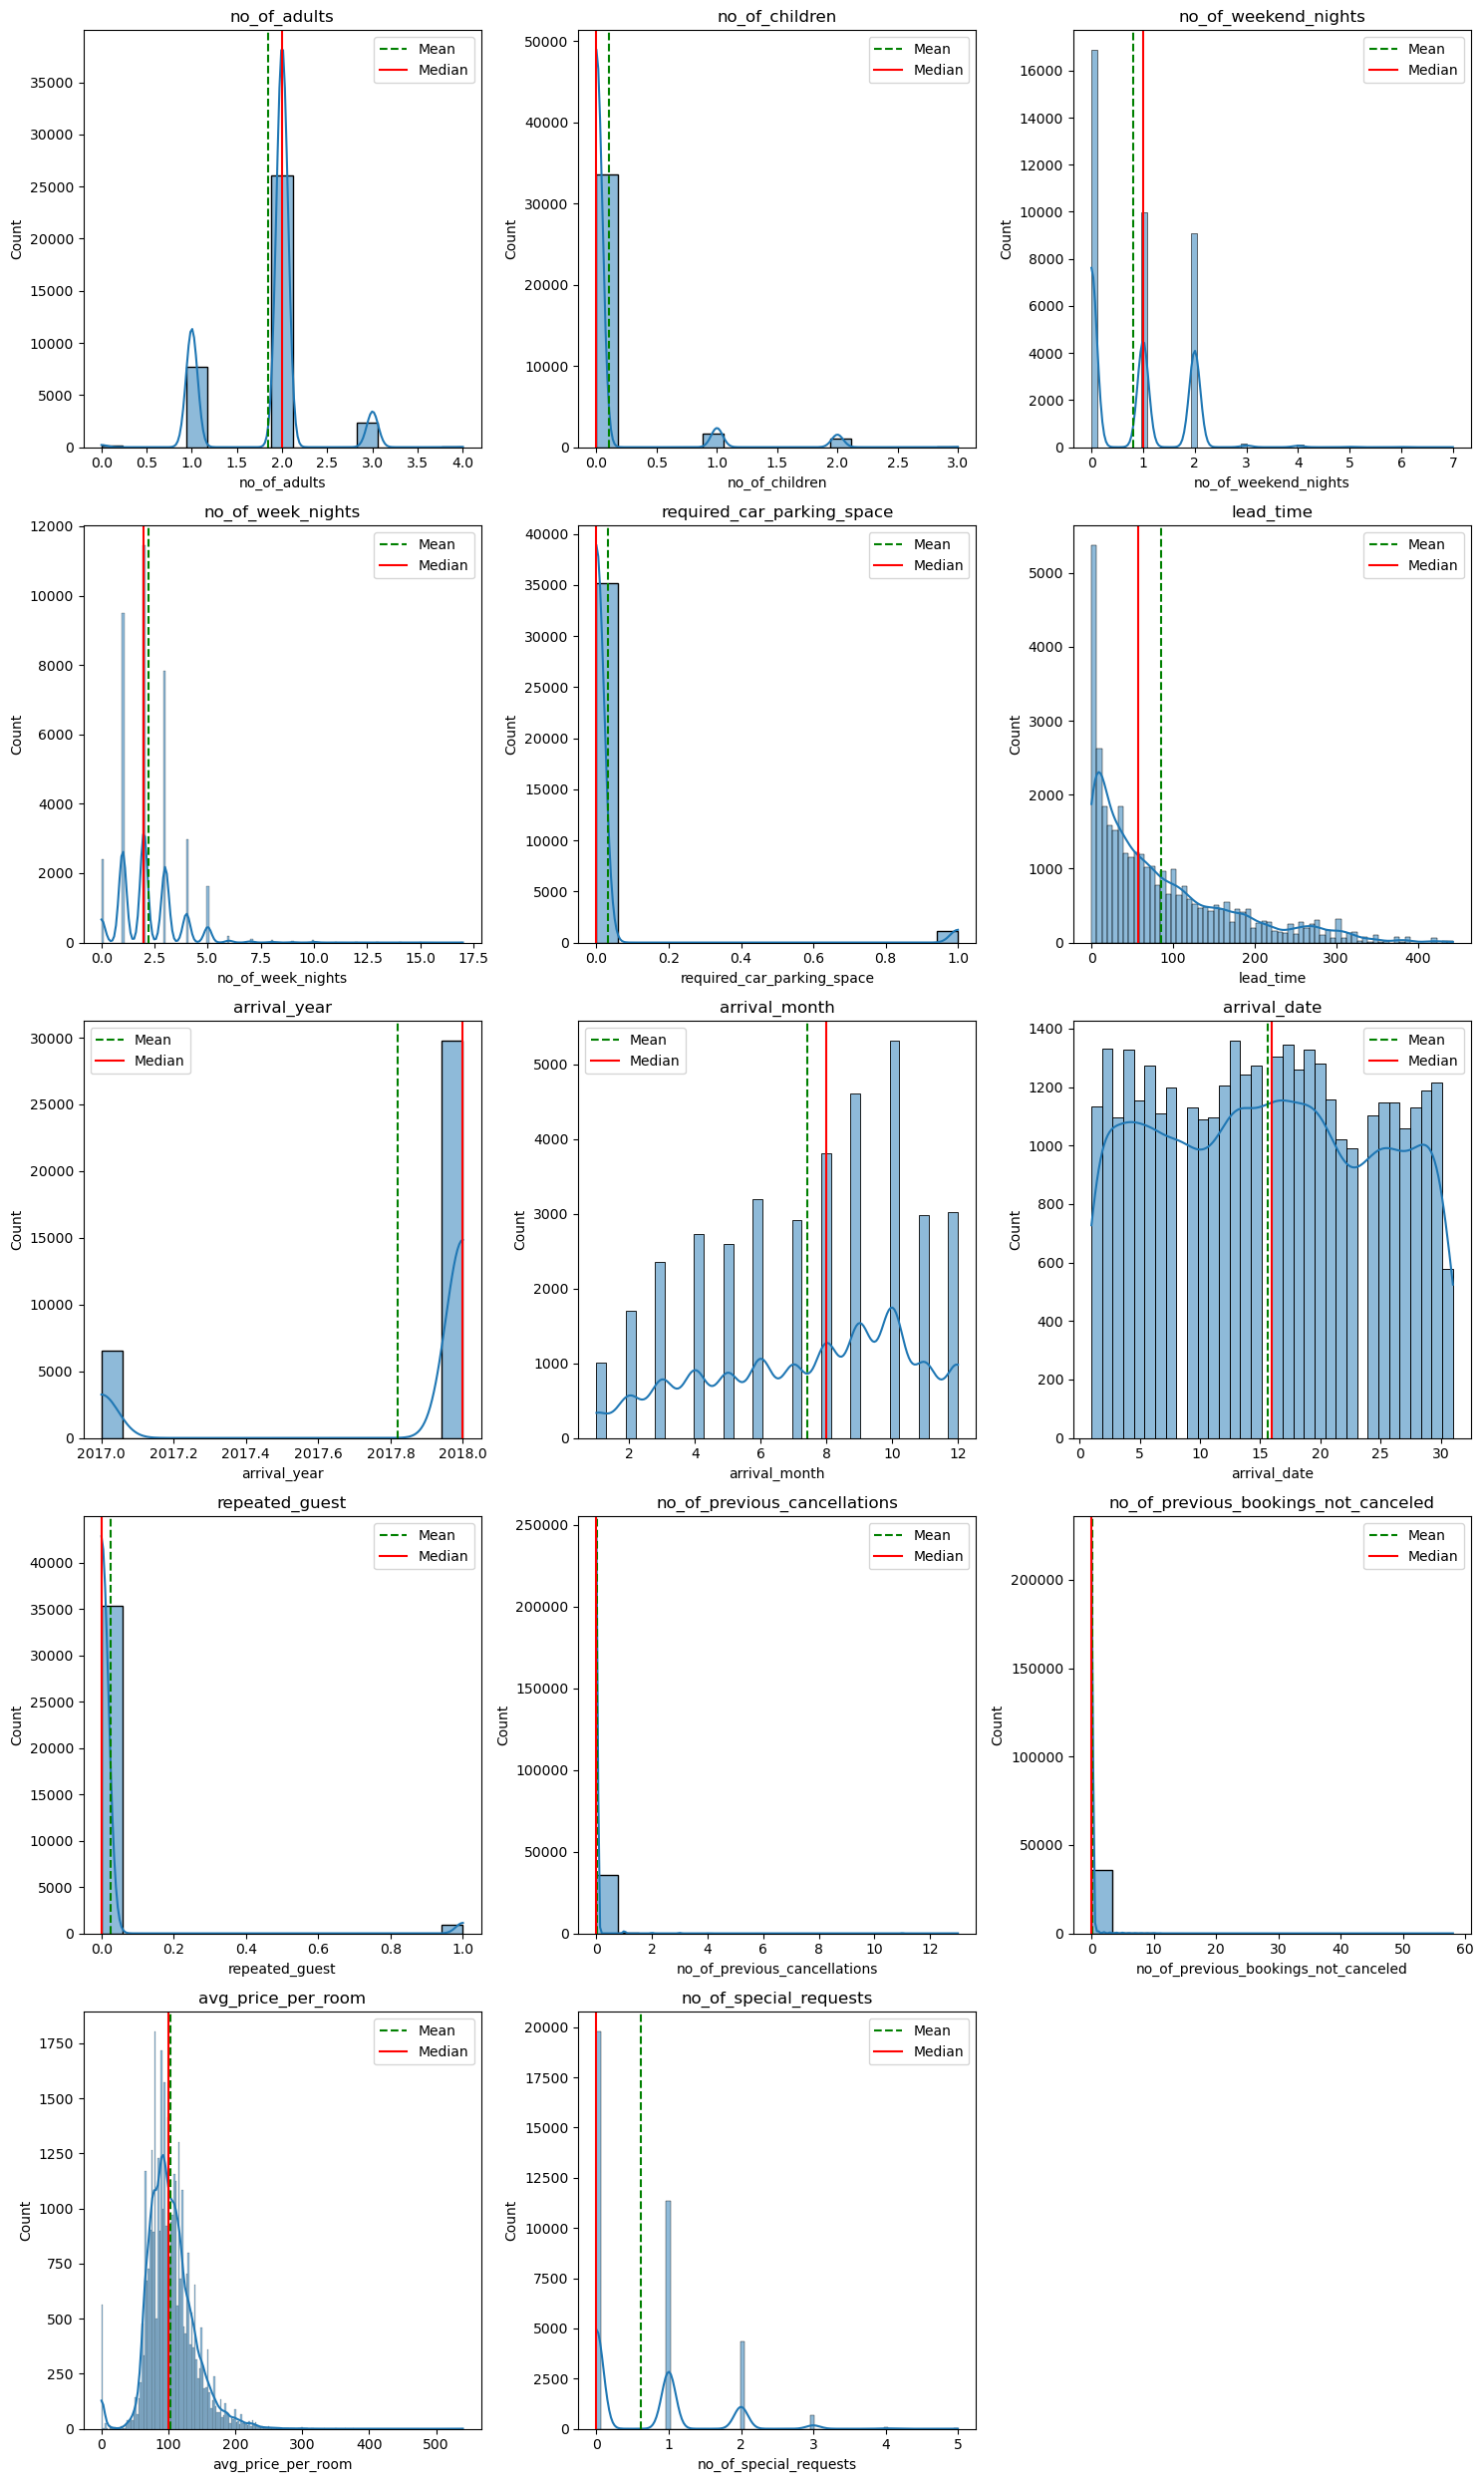

In [14]:
# Lets create a function to plots the histogram for our numerical features
def plot_numerical_data(data, feature, ax, bins=None):
    
    if bins is None:
        sns.histplot(data=data, x=feature, kde=True, ax=ax)
    else:
        sns.histplot(data=data, x=feature, kde=True, ax=ax, bins=bins)

    ax.axvline(data[feature].mean(), color='green', linestyle='--', label='Mean')
    ax.axvline(data[feature].median(), color='red', linestyle='-', label='Median')
    ax.legend()
    ax.set_title(feature)

column_names_num = data.select_dtypes(include=['number']).columns.tolist() # gives us the names of the numerical columns

num_columns = 3 # we want to plot our histrograms 3 in a row
num_rows = len(column_names_num) // num_columns + (1 if len(column_names_num) % num_columns > 0 else 0) # calculating rows

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 5)) # create the figure and axes
axes = axes.flatten()

for i, feature in enumerate(column_names_num):  # plot our histograms
    plot_numerical_data(data, feature, axes[i])

for j in range(i + 1, len(axes)): # delete empty subplots
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

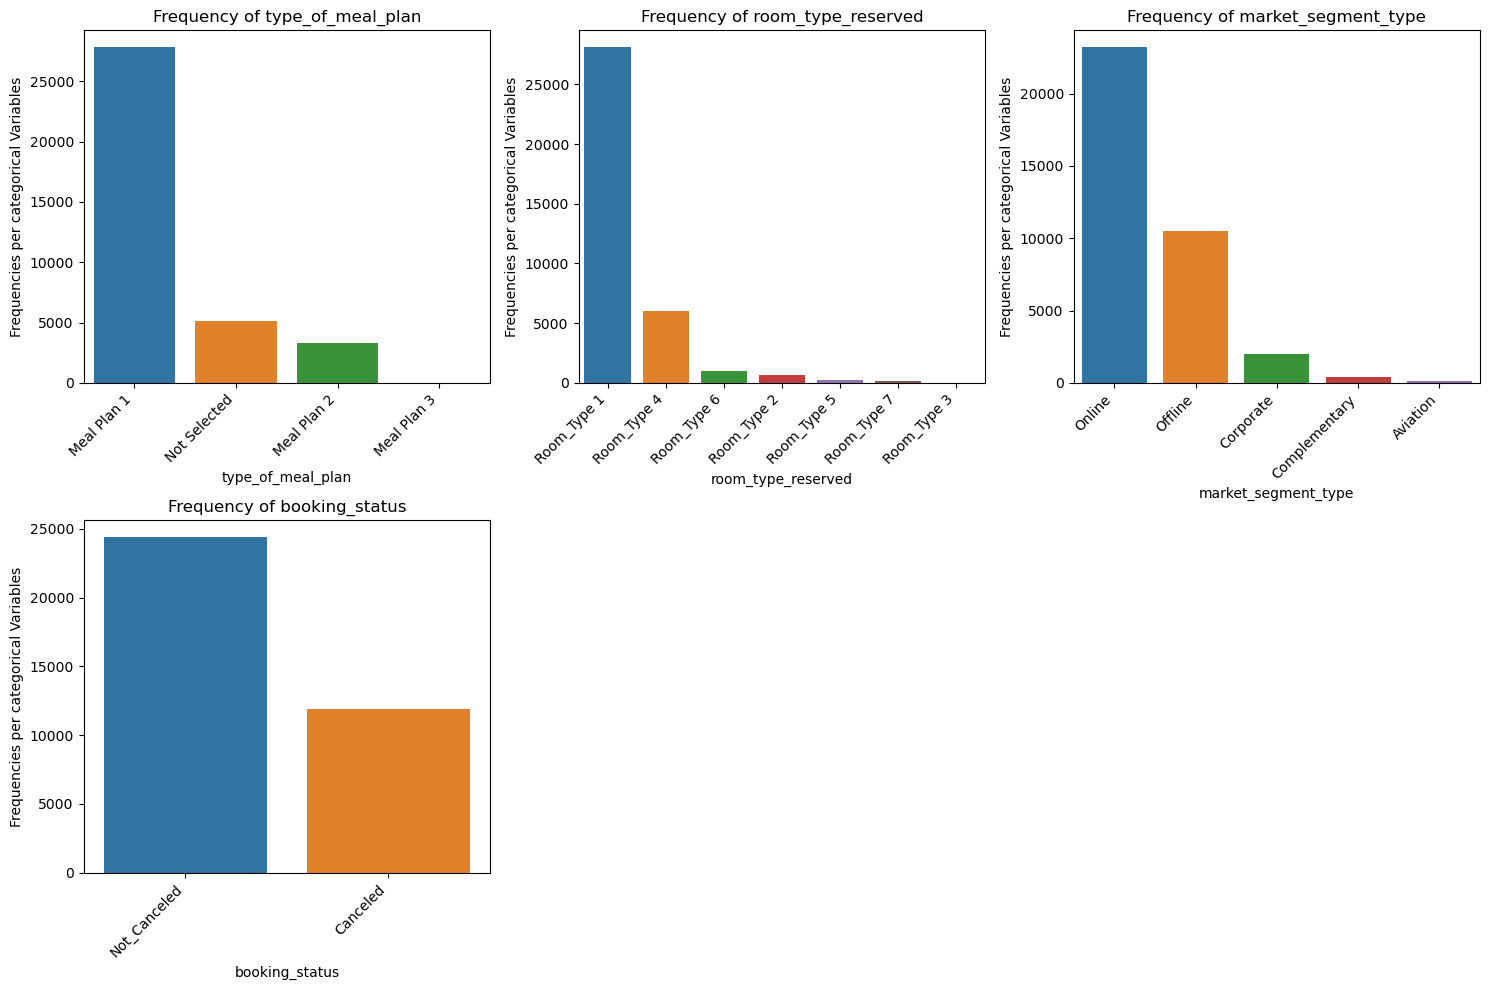

In [15]:
def plot_categorical_data(data, feature, ax):
    
    data_1 = data[feature].value_counts()
    sns.barplot(x=data_1.index, y=data_1.values, ax=ax)
    ax.set_ylabel('Frequencies per categorical Variables')
    ax.set_xlabel(feature)
    ax.set_title(f'Frequency of {feature}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

column_names_cat = data.select_dtypes(include=['object']).columns.tolist()

num_columns = 3 # we want to plot our histrograms 3 in a row
num_rows = len(column_names_cat) // num_columns + (1 if len(column_names_cat) % num_columns > 0 else 0)

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 5)) # create the figure and axes
axes = axes.flatten()

for i, feature in enumerate(column_names_cat):  # plot our barplot
    plot_categorical_data(data, feature, axes[i])

for j in range(i + 1, len(axes)): # delete empty subplots
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## Bivariate Analysis

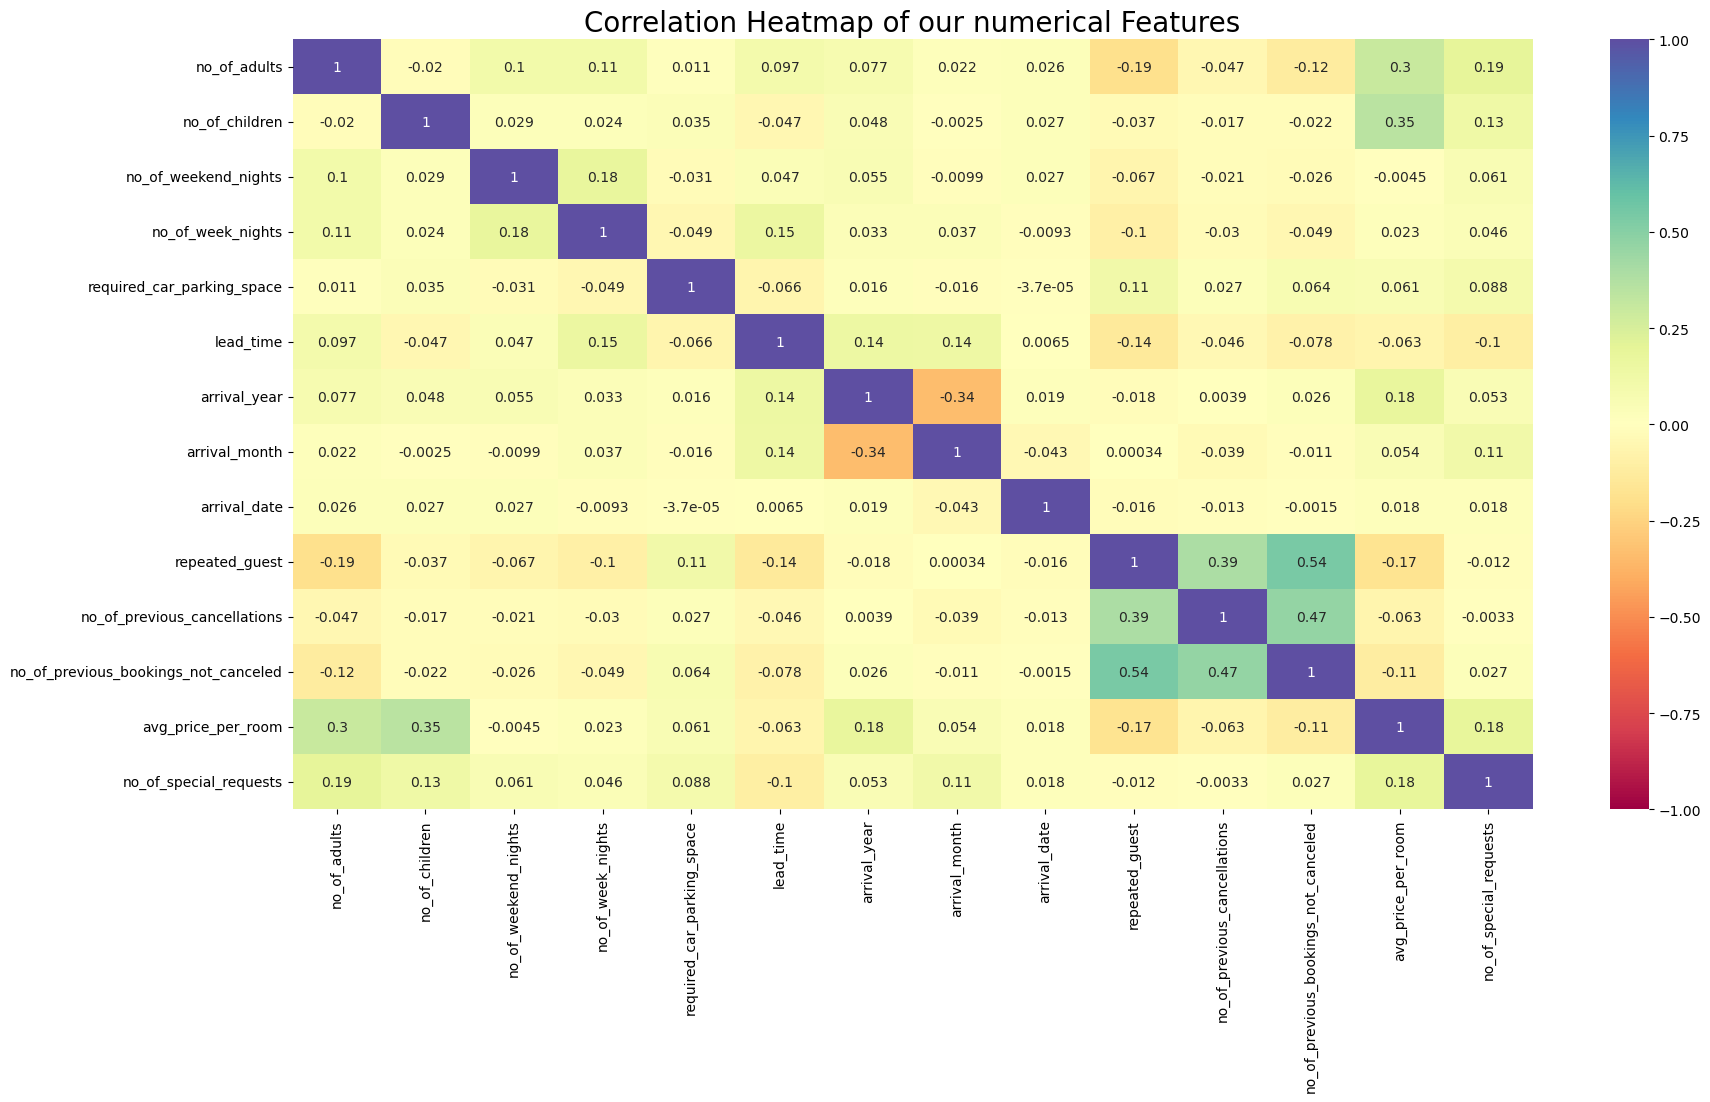

In [16]:
# Looking at the correlation between our numerical features
data_num = data.select_dtypes(include=[np.number]) # create a dataset just with the numbers
plt.figure(figsize=(20,10))
sns.heatmap(data_num.corr(), annot=True, cmap='Spectral', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of our numerical Features', fontsize=20)
plt.show()

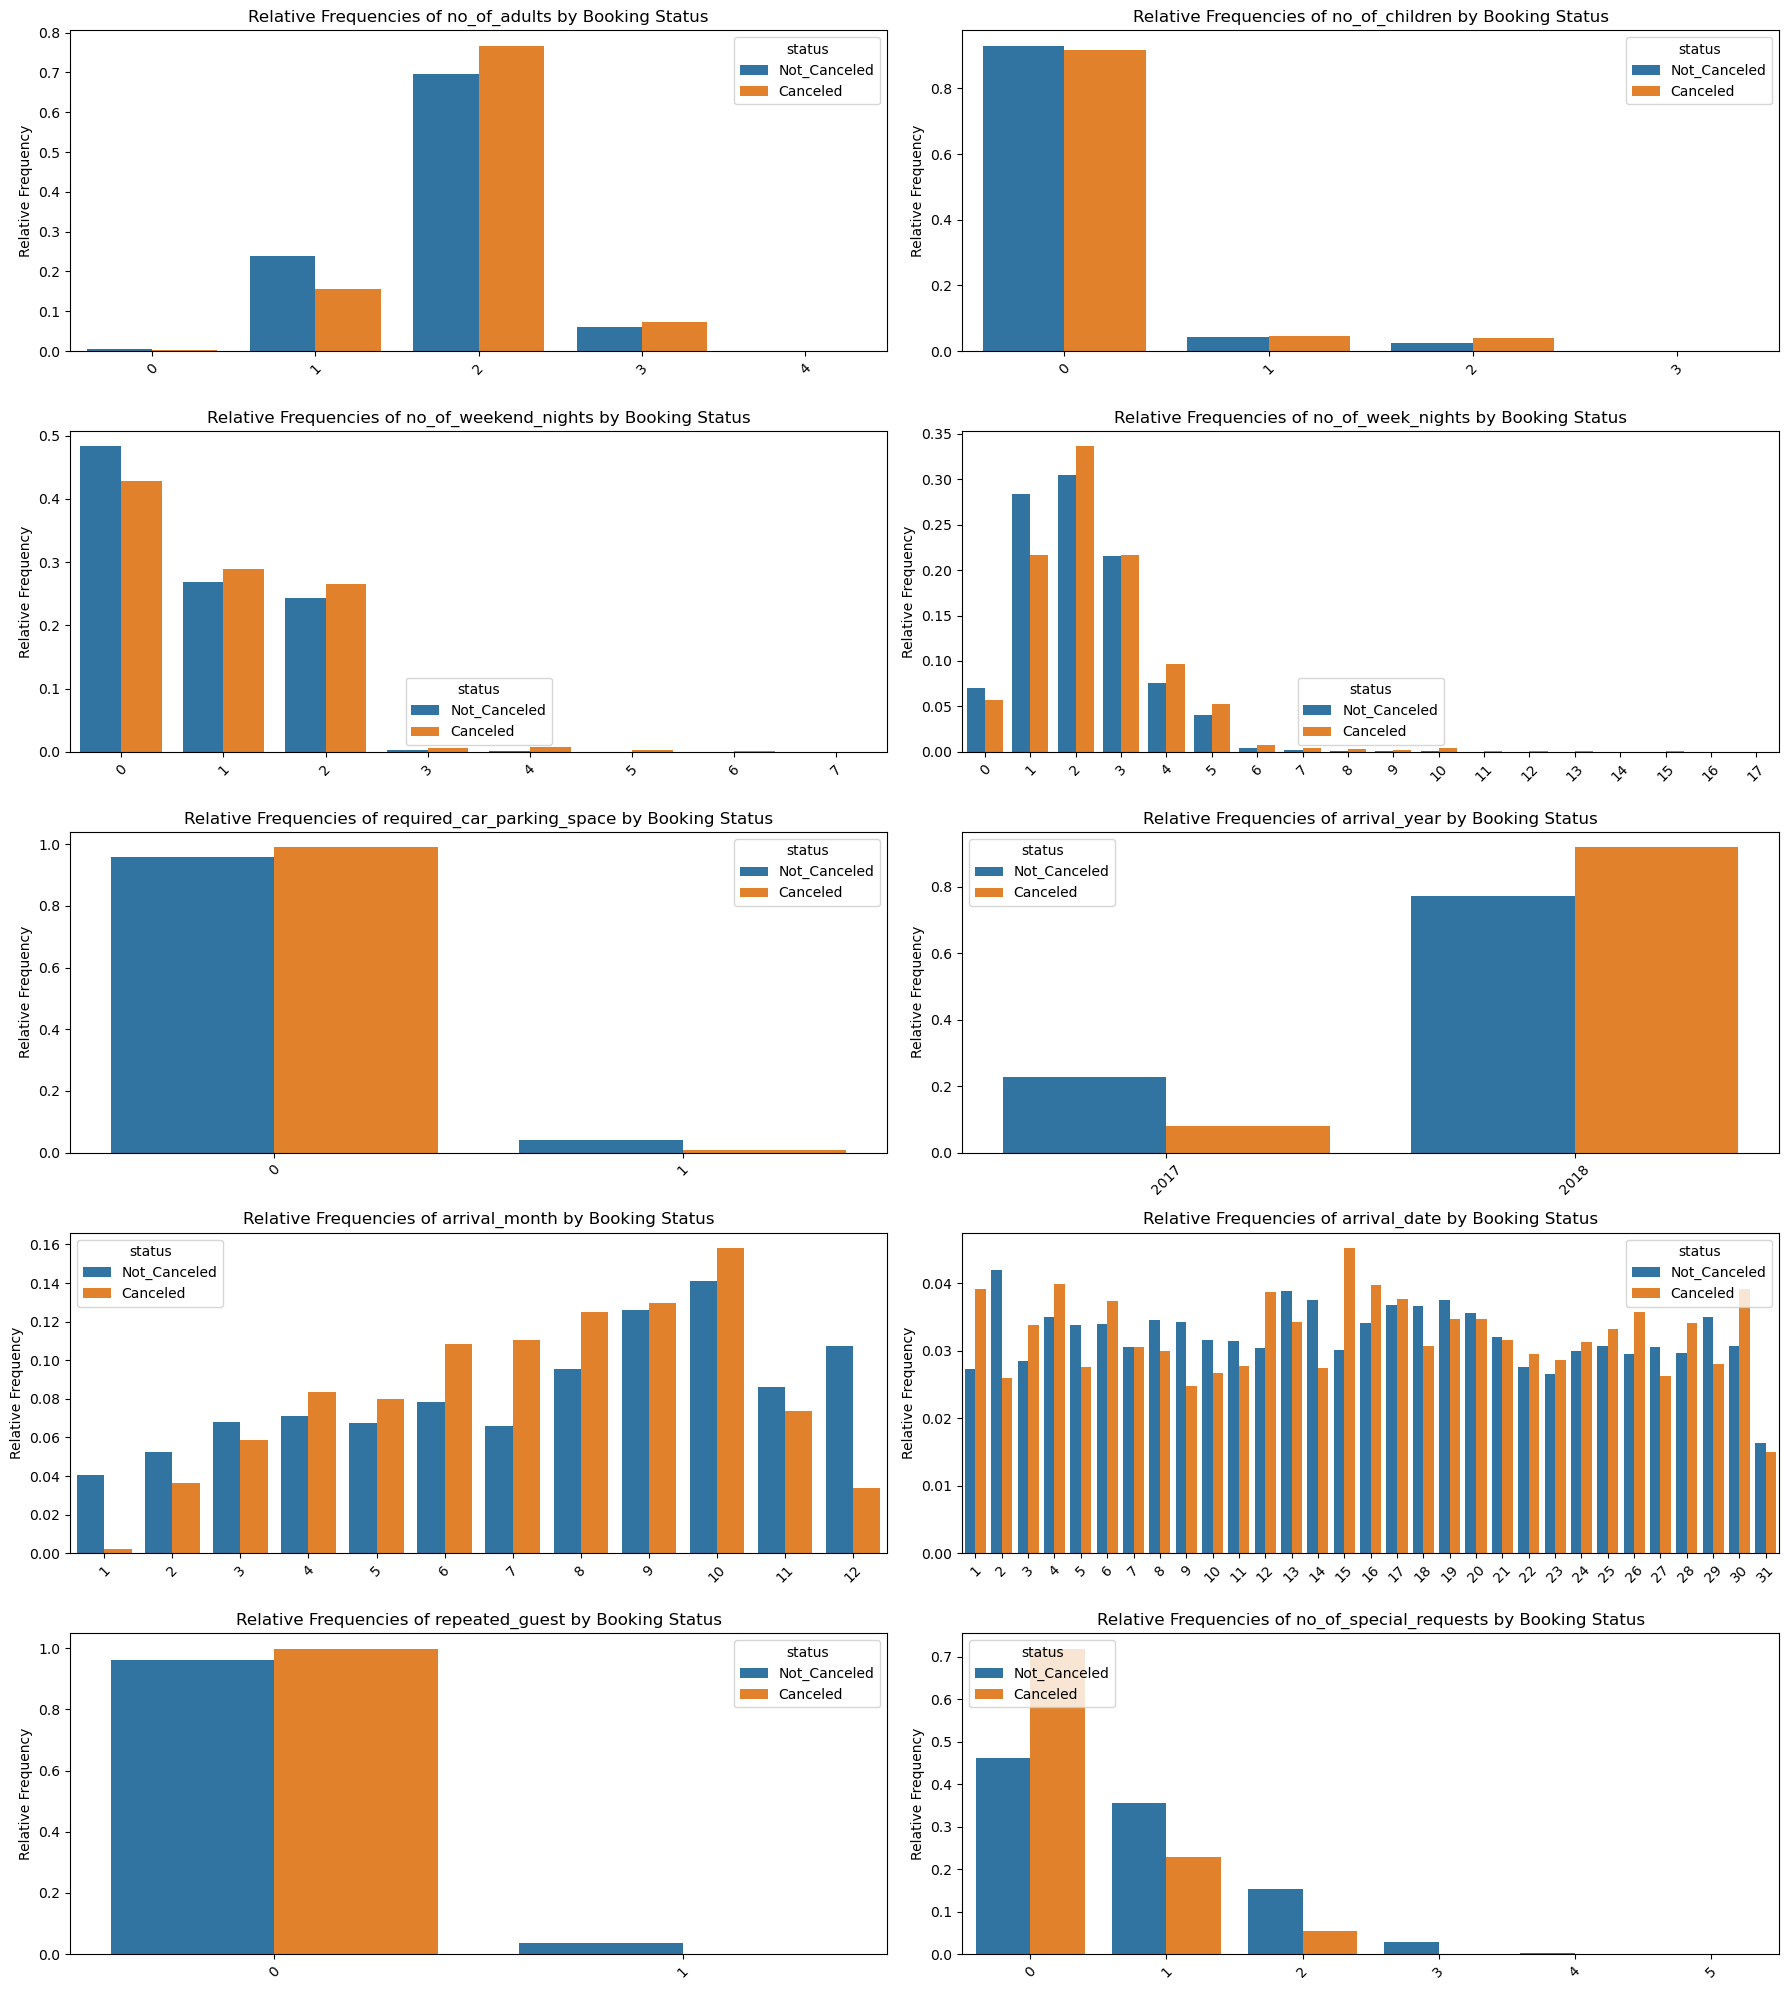

In [17]:
# Visualizing potential dependencies between booking_status and our numerical features - relative frequencies!
features = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights',
            'required_car_parking_space', 'arrival_year', 'arrival_month',
            'arrival_date', 'repeated_guest', 'no_of_special_requests']
            
def calculate_frequencies(data, feature):
    result = []
    for status in ['Not_Canceled', 'Canceled']:  # Betrachte nur diese beiden Zustände
        subset = data[data['booking_status'] == status]
        counts = subset[feature].value_counts(normalize=True).reset_index()
        counts.columns = [feature, 'frequency']
        counts['status'] = status
        result.append(counts)
    return pd.concat(result)

# Plotten der Daten
num_columns = 2
fig, axes = plt.subplots((len(features) + num_columns - 1) // num_columns, num_columns, figsize=(18, 4 * len(features) // num_columns))
axes = axes.flatten()

for i, feature in enumerate(features):
    freqs = calculate_frequencies(data, feature)
    sns.barplot(x=feature, y='frequency', hue='status', data=freqs, ax=axes[i])
    axes[i].set_title(f'Relative Frequencies of {feature} by Booking Status')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Relative Frequency')
    axes[i].tick_params(axis='x', rotation=45)

# Entferne überschüssige Subplots, falls vorhanden
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


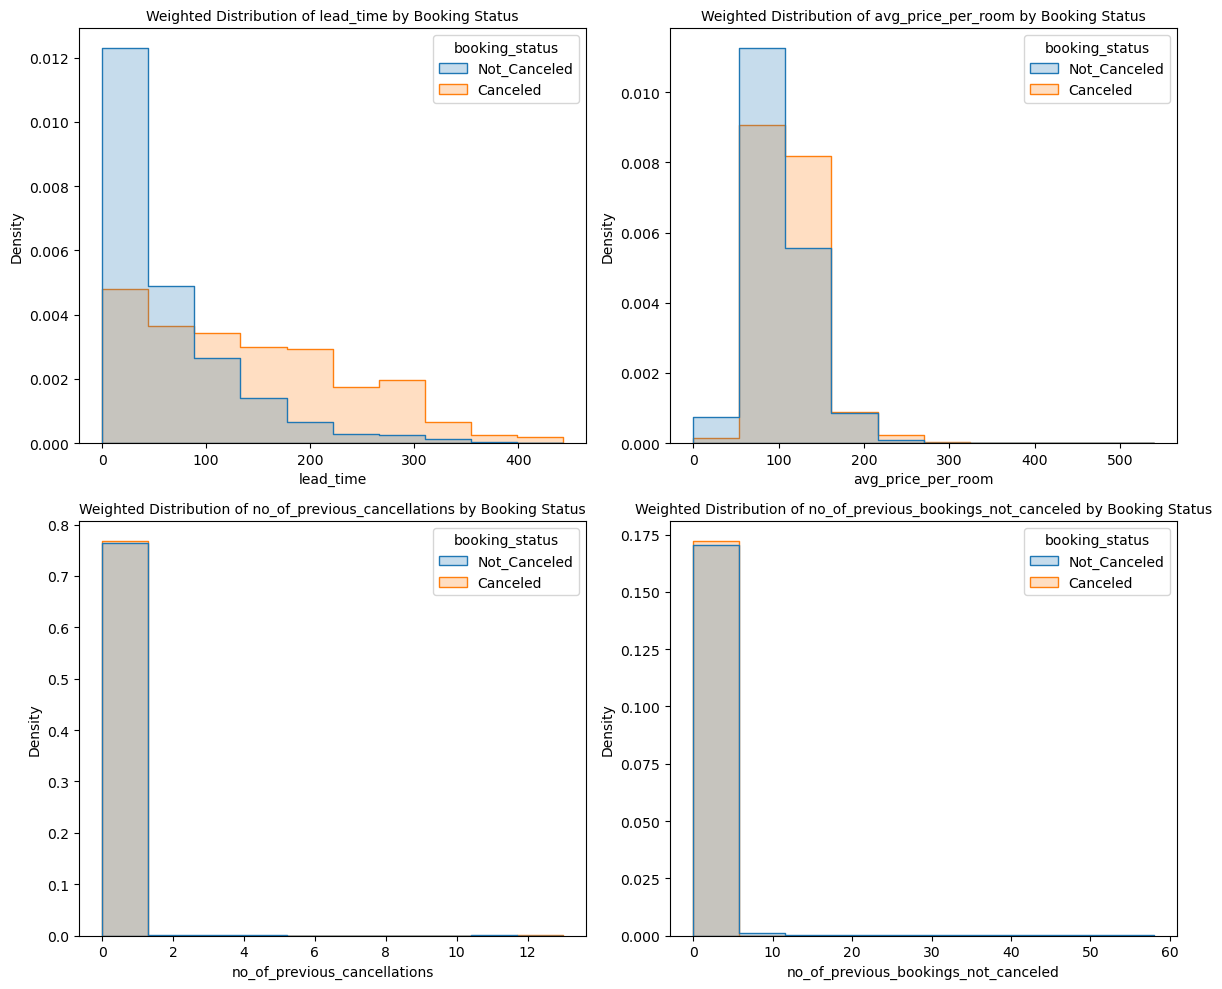

In [18]:
# Special visualization for 'lead_time','avg_price_per_room' features
total_not_canceled = data[data['booking_status'] == 'Not_Canceled'].shape[0]
total_canceled = data[data['booking_status'] == 'Canceled'].shape[0]

# This time I work with weights
data['weight'] = data['booking_status'].apply(lambda x: 1 / total_not_canceled if x == 'Not_Canceled' else 1 / total_canceled)

numeric_features = ['lead_time', 'avg_price_per_room', 'no_of_previous_cancellations',
                    'no_of_previous_bookings_not_canceled']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))  
axes = axes.flatten() 

for i, feature in enumerate(numeric_features):
    sns.histplot(data=data, x=feature, hue='booking_status', weights='weight',
                 element='step', stat='density', common_norm=False, ax=axes[i])
    axes[i].set_title(f'Weighted Distribution of {feature} by Booking Status', fontsize=10)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Density')

plt.tight_layout()
plt.show()


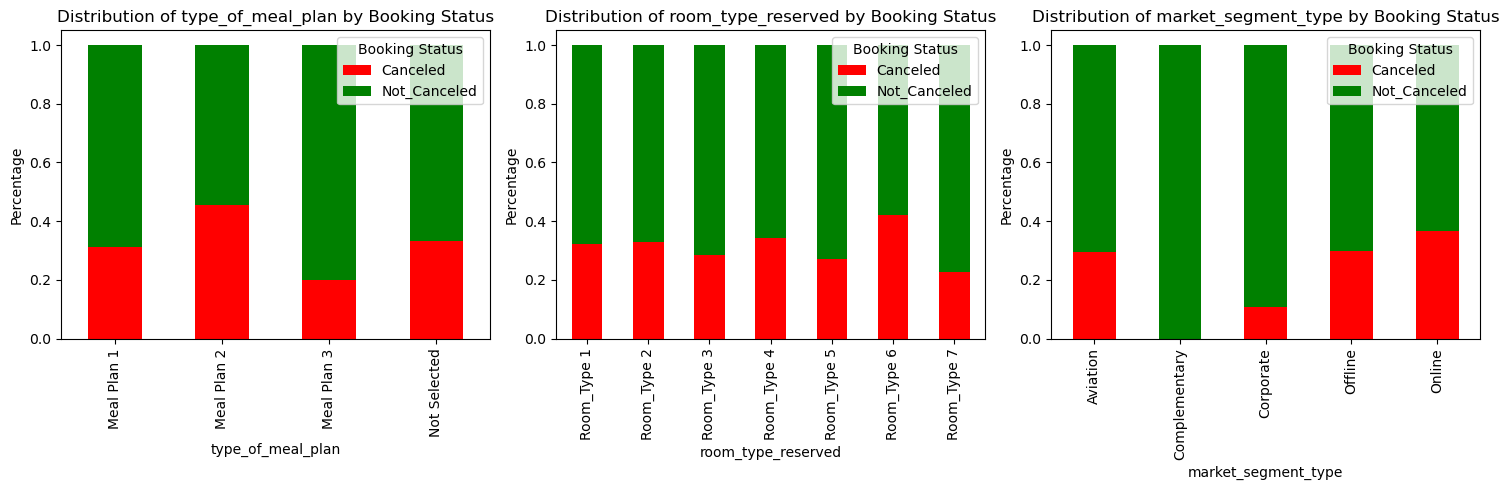

In [19]:
# Visualizing potential dependencies between booking_status and our none numerical features
column_names_cat = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']

num_columns = 3
num_rows = (len(column_names_cat) + num_columns - 1) // num_columns
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 5))
axes = axes.flatten()

for i, feature in enumerate(column_names_cat):
    ax = axes[i]
    if feature != 'booking_status':  # Sicherstellen, dass wir nicht 'booking_status' gegen sich selbst plotten
        # Erstelle eine Kreuztabelle und normalisiere nach Zeilen
        data = pd.crosstab(df[feature], df['booking_status'], normalize='index')
        data.plot(kind='bar', stacked=True, ax=ax, color=['red', 'green'])
        ax.set_title(f'Distribution of {feature} by Booking Status')
        ax.set_xlabel(feature)
        ax.set_ylabel('Percentage')
        ax.legend(title='Booking Status')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Conclusions

Just some observations with no interpretive deep dive

- Mostly 2 adults are visiting the hotel
- We see that more adults are visiting the hotel without any children
- Parking lots are mostly not needed
- Visiting frequency increases from January until October
- Meal Plan 1, room type 1 are mostly used
- The most bookings are made online
- We have a cancellation rate among 2 adults visiting the hotel, in the month of April, June, July, August and October. Also we have higher cancellations rate by online booker and visitors using room type 6 and meal plan 2

# Building our Classification Model

## Preparing Data for the Model

In [44]:
# Important libraries for our classification models in scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Algorithms to use
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn import metrics


In [45]:
data = pd.read_csv(file)
data["no_of_children"] = data["no_of_children"].replace([9, 10], 3)
data = data.drop(['Booking_ID'], axis='columns')
data["booking_status"] = data["booking_status"].apply(lambda x: 1 if x == "Canceled" else 0)

In [46]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,0
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,0
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,1
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,1
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,1


In [47]:
# Separating the target variable and other variables
X = data.drop(columns = 'booking_status')
Y = data['booking_status']

In [48]:
X = pd.get_dummies(X, drop_first=True).astype(int)

In [49]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

## Decision Tree for Classification

In [50]:
# Function to print classification report and get confusion matrix in a proper format

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    
    cm = confusion_matrix(actual, predicted)
    
    plt.figure(figsize = (8, 5))
    
    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['Not Canceled', 'Canceled'], yticklabels = ['Not Canceled', 'Canceled'])
    
    plt.ylabel('Actual')
    
    plt.xlabel('Predicted')
    
    plt.show()

In [51]:
# Fitting the decision tree classifier on the training data
d_tree =  DecisionTreeClassifier(random_state = 7)
d_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=7)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     17029
           1       1.00      0.99      0.99      8363

    accuracy                           0.99     25392
   macro avg       0.99      0.99      0.99     25392
weighted avg       0.99      0.99      0.99     25392



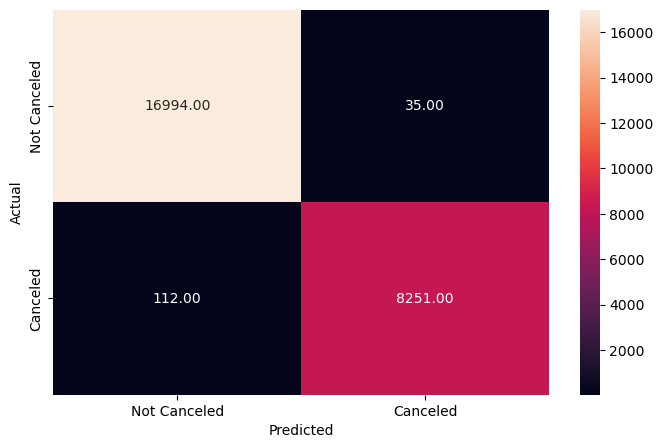

In [52]:
# Checking performance on the training data
y_pred_train1 = d_tree.predict(X_train)
metrics_score(y_train, y_pred_train1)

**Reading confusion matrix (clockwise):**

- **True Positive**: Predicting the customer will not cancel the booking and the customer does not cancel the booking.
- **False Negative**: Predicting the customer will cancel the booking but the customer does not cancel the booking.
- **True Negative**: Predicting the customer will cancel the booking and the customer cancels the booking.
- **False Positive**: Predicting the customer will not cancel the booking but the customer cancels the booking.

--------
**Observations:**

* There is less error on the training set, i.e., each sample has been classified correctly except few points. The model has performed very well on the training set.
* As we know, a decision tree will continue to grow and classify each data point correctly if no restrictions are applied, as the trees will learn all the patterns in the training set. So, it can easily overfit the training data.


**Let's check the performance on test data to see if the model is overfitting.**

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      7361
           1       0.80      0.81      0.80      3522

    accuracy                           0.87     10883
   macro avg       0.85      0.86      0.85     10883
weighted avg       0.87      0.87      0.87     10883



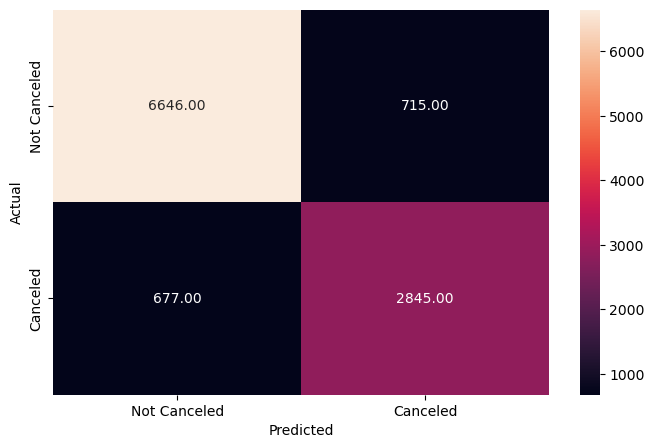

In [53]:
# Checking performance on the testing data
y_pred_test1 = d_tree.predict(X_test)
metrics_score(y_test, y_pred_test1)

* The decision tree model is overfitting the training data as expected and is not able to generalize well on the test set.

**Let's try hyperparameter tuning using GridSearchCV to find the optimal max_depth** to reduce overfitting of the model. We can tune some other hyperparameters as well.

### Decision Tree - Hyperparameter Tuning

We will use the class_weight hyperparameter with the value equal to {0: 0.3, 1: 0.7} which is **approximately** the opposite of the imbalance in the original data. This would tell the model that 1 is the important class here.

In [54]:
# Choose the type of classifier 
d_tree_tuned = DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.3, 1: 0.7})

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations - f1 score for class 1
scorer = metrics.make_scorer(f1_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=9,
                       min_samples_leaf=5, random_state=7)

              precision    recall  f1-score   support

           0       0.93      0.86      0.89     17029
           1       0.75      0.86      0.80      8363

    accuracy                           0.86     25392
   macro avg       0.84      0.86      0.85     25392
weighted avg       0.87      0.86      0.86     25392



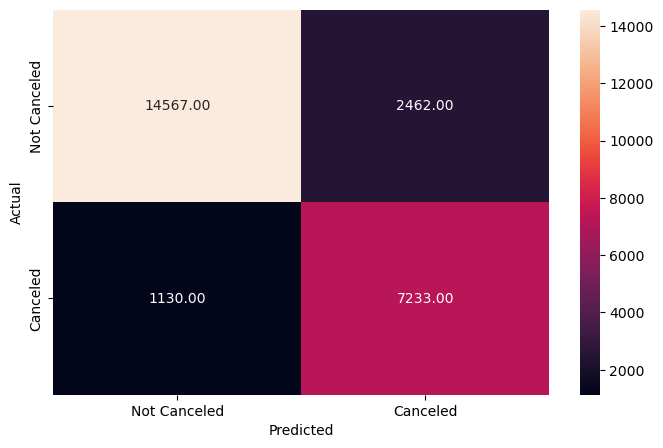

In [55]:
# Checking performance on the training data
y_pred_train2 = d_tree_tuned.predict(X_train)
metrics_score(y_train, y_pred_train2)

**Observations:**
- We can see that the **performance on the training data has decreased** which can be expected as we are trying not to overfit the training dataset.
- **The model can able to identify the majority of Hotel booking Cancellations.**

**Let's check the model performance on the testing data**

              precision    recall  f1-score   support

           0       0.92      0.85      0.88      7361
           1       0.73      0.84      0.78      3522

    accuracy                           0.85     10883
   macro avg       0.82      0.84      0.83     10883
weighted avg       0.86      0.85      0.85     10883



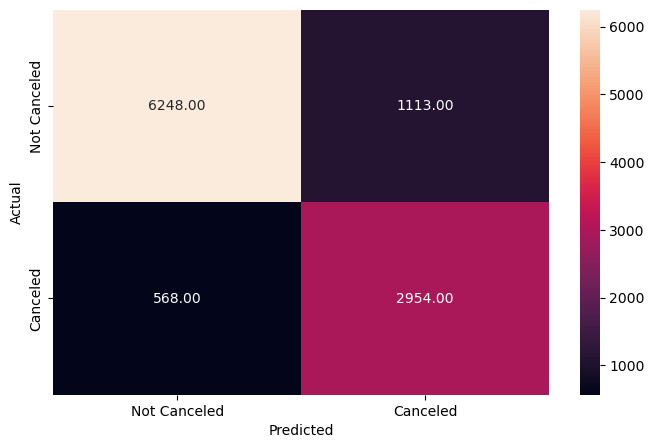

In [58]:
# Checking performance on the testing data
y_pred_test2 = d_tree_tuned.predict(X_test)
metrics_score(y_test, y_pred_test2)

**Observations:**
- We can observe that the **recall for class 1 has increased but the precision has decreased.** 
- **The overfitting has reduced significantly and now the model is performing more generlized on both training and testing data.**

--------
Let's visualize the tuned decision tree** and observe the decision rules
**It is hard to visualize and interpret the tree with depth = 9, We can reduce the depth to 3 and visualize it**

In [59]:
tree_model = DecisionTreeClassifier(class_weight = {0: 0.3, 1: 0.7}, max_depth = 3,
                       min_samples_leaf = 5, random_state = 7)

# Fit the best algorithm to the data
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=3,
                       min_samples_leaf=5, random_state=7)

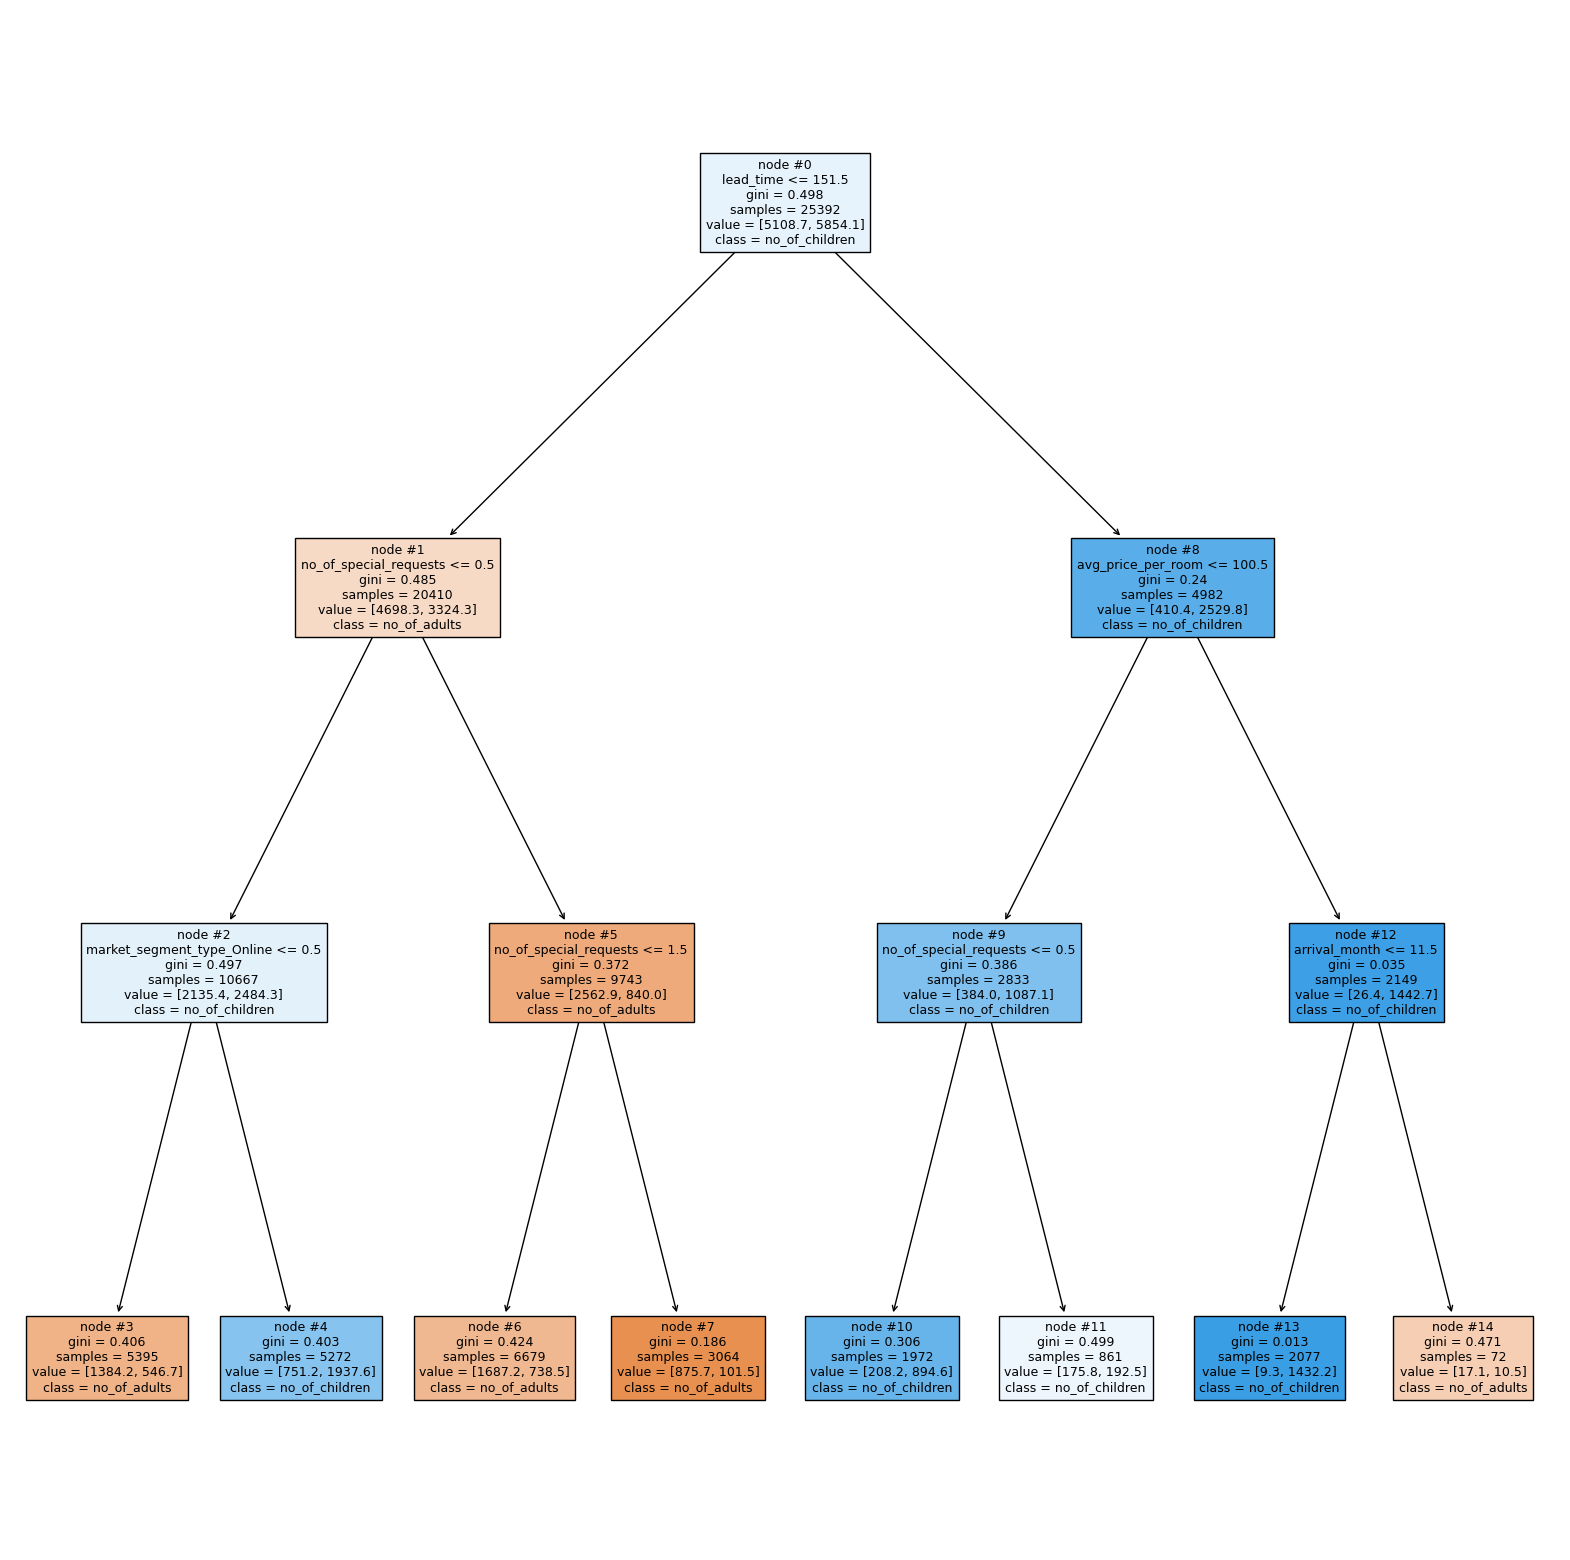

In [63]:
features = list(X.columns)

plt.figure(figsize = (20, 20))
tree.plot_tree(tree_model, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = features)
plt.show()

**Note:** Blue leaves represent the hotels that were about to be canceled, i.e., **y[1]**, while the light orange leaves represent the hotels that were not canceled, i.e., **y[0]**. Also, the more the number of observations in a leaf, the darker its color gets.

**Observations:**
- **The first split in the decision tree is at lead_time** which implies that it is one of the most important factors in deciding whether the booking will be canceled or not.
- As per decision rules, customers whose lead time is lesser, are less likely to cancel the hotel booking.
- Among the customers whose lead time is higher and the average price of the room is ~ 100 euros then he/she is more likely to cancel the hotel booking.
- Among the customers whose lead time is higher, the average price of the room is ~ 100 euros and the arrival_month is less than 11.5 then he/she is more likely to cancel the hotel booking.

**Let's look at the feature importance** of the tuned decision tree model

In [64]:
# Importance of features in the tree building

print (pd.DataFrame(d_tree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                               Imp
lead_time                             4.109090e-01
market_segment_type_Online            1.591131e-01
no_of_special_requests                1.446554e-01
avg_price_per_room                    1.022030e-01
arrival_month                         4.743640e-02
no_of_adults                          2.344446e-02
no_of_weekend_nights                  2.220393e-02
arrival_year                          2.053482e-02
arrival_date                          2.026881e-02
no_of_week_nights                     1.865833e-02
required_car_parking_space            1.193570e-02
market_segment_type_Offline           1.168751e-02
type_of_meal_plan_Not Selected        3.183170e-03
type_of_meal_plan_Meal Plan 2         2.018175e-03
room_type_reserved_Room_Type 4        1.006363e-03
room_type_reserved_Room_Type 2        4.241413e-04
room_type_reserved_Room_Type 5        2.033624e-04
no_of_children                        1.143816e-04
room_type_reserved_Room_Type 6 

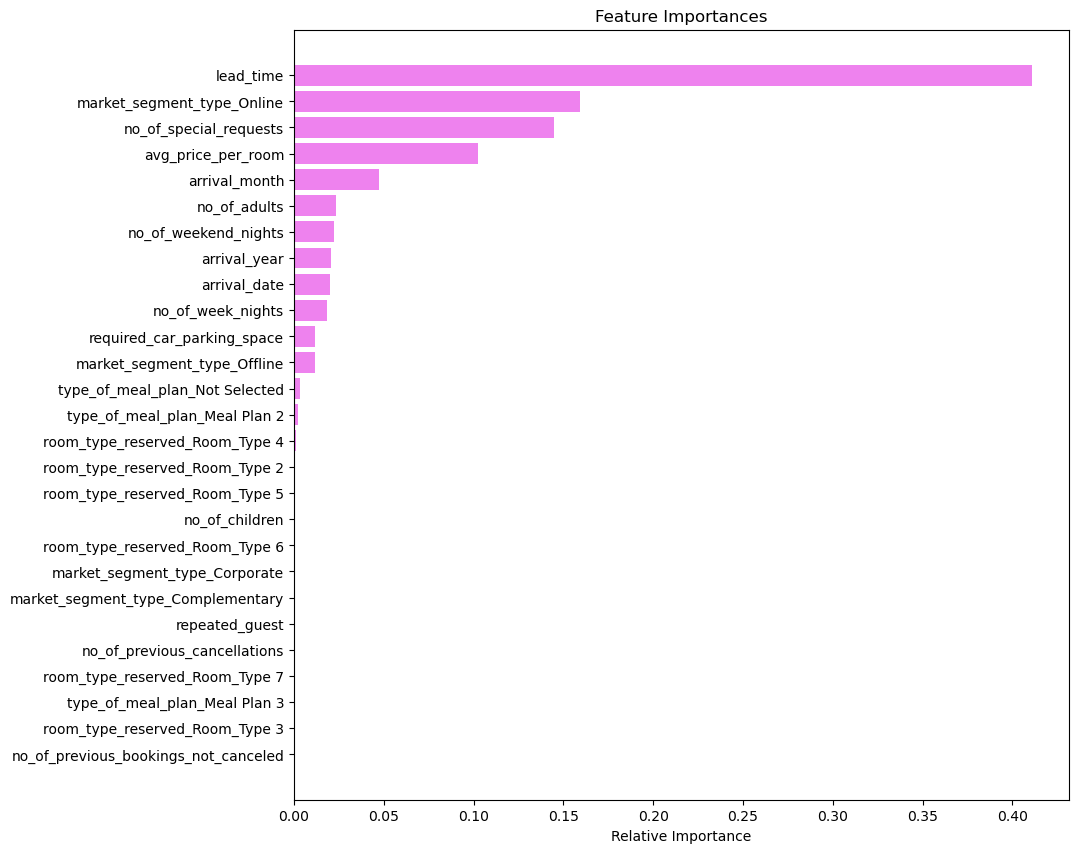

In [66]:
# Plotting the feature importance
importances = d_tree_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize = (10, 10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

**Observations:**
- **The lead_time, market_segment_type_Online, no_of_special_requests and avg_price_per_room are the most important features** **followed by arrival_month.**
- **The rest of the variables have no impact in this model except no_of_adults, no_of_weekend_nights, arrival_date, arrival_year, no_of_week_nights, required_car_parking_space, and market_segment_type_Offline while deciding whether a hotel booking will be canceled or not**.

Now, let's build another model - **a random forest classifier.**

## Random Forest for Classification

In [68]:
# Fitting the random forest tree classifier on the training data
rf_estimator = RandomForestClassifier(random_state = 7, criterion = "entropy")
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=7)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     17029
           1       0.99      0.99      0.99      8363

    accuracy                           0.99     25392
   macro avg       0.99      0.99      0.99     25392
weighted avg       0.99      0.99      0.99     25392



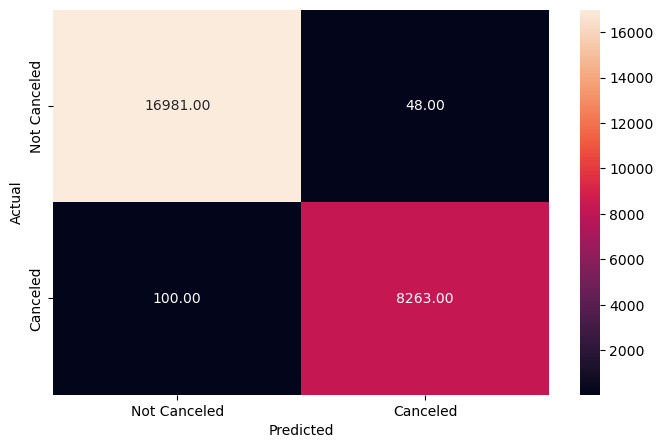

In [69]:
# Checking performance on the training data
y_pred_train3 = rf_estimator.predict(X_train)
metrics_score(y_train, y_pred_train3)

**Observations:**
- Similar to the decision tree, **the random forest is giving a perfect/better performance on the training data.**
- The model is most likely overfitting to the training dataset as we observed for the decision tree. 

**Let's confirm this by checking its performance on the testing data**

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      7361
           1       0.88      0.82      0.85      3522

    accuracy                           0.90     10883
   macro avg       0.90      0.88      0.89     10883
weighted avg       0.90      0.90      0.90     10883



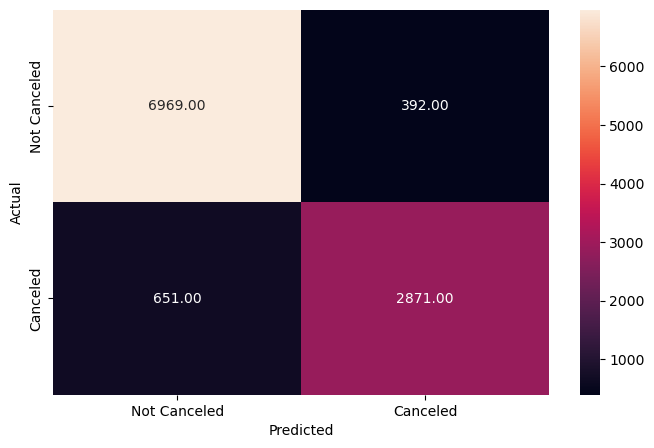

In [70]:
# Checking performance on the testing data
y_pred_test3 = rf_estimator.predict(X_test)
metrics_score(y_test, y_pred_test3)

**Observations:**
- Comparatively, the results from random forest classifier were decent on both training and testing data.
- It has higher F1_Score on the testing data.

**Let's see if we can able to get a better model by tuning the random forest classifier**

### Random Forest Classifier - Hyperparameter Tuning

Let's try **tuning some of the important hyperparameters of the Random Forest Classifier**. 

We will **not** tune the `criterion` hyperparameter as we know from hyperparameter tuning for decision trees that `entropy` is a better splitting criterion for this data.

In [71]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

# Grid of parameters to choose from
parameters = {"n_estimators": [80, 90, 110],
    "max_depth": [5, 6, 7],
    "max_features": [0.8, 0.9, 1]
             }

# Type of scoring used to compare parameter combinations - f1 score for class 1
scorer = metrics.make_scorer(f1_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned_base = grid_obj.best_estimator_

In [72]:
# Fitting the best algorithm to the training data
rf_estimator_tuned_base.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, max_features=0.8,
                       n_estimators=110, random_state=7)

              precision    recall  f1-score   support

           0       0.88      0.93      0.90     17029
           1       0.84      0.73      0.78      8363

    accuracy                           0.87     25392
   macro avg       0.86      0.83      0.84     25392
weighted avg       0.86      0.87      0.86     25392



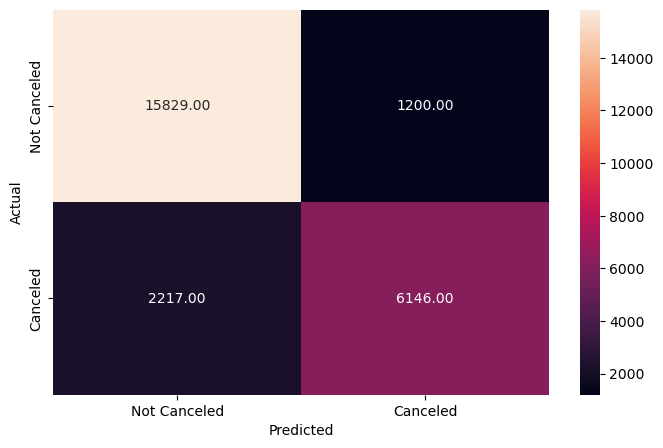

In [73]:
# Checking performance on the training data
y_pred_train4 = rf_estimator_tuned_base.predict(X_train)

metrics_score(y_train, y_pred_train4)

**Observations:**
- We can see that after hyperparameter tuning, the model score was decreased but it has less variance. 
- We can try adding some other hyperparameters and/or changing values of some hyperparameters to tune the model and see if we can get better performance.

**Note:** **GridSearchCV can take a long time to run** depending on the number of hyperparameters and the number of values tried for each hyperparameter. **Therefore, we have reduced the number of values passed to each hyperparameter.** 

------

**Note:** The below code might take some time to run depending on your system's configuration.

In [74]:
# Choose the type of classifier 
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

# Grid of parameters to choose from
parameters = {"n_estimators": [110, 120],
    "max_depth": [6, 7],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight" : ["balanced",{0: 0.3, 1: 0.7}]
             }

# Type of scoring used to compare parameter combinations - f1 score for class 1
scorer = metrics.make_scorer(f1_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [75]:
# Fitting the best algorithm to the training data
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=7, max_features=0.8, max_samples=0.9,
                       min_samples_leaf=20, n_estimators=120, random_state=7)

              precision    recall  f1-score   support

           0       0.89      0.89      0.89     17029
           1       0.79      0.79      0.79      8363

    accuracy                           0.86     25392
   macro avg       0.84      0.84      0.84     25392
weighted avg       0.86      0.86      0.86     25392



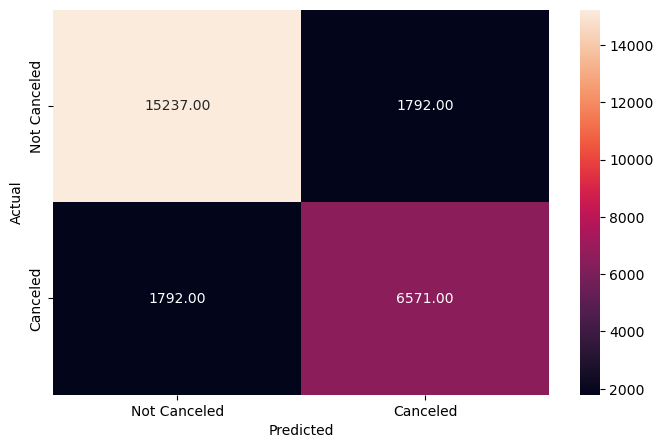

In [76]:
y_pred_train5 = rf_estimator_tuned.predict(X_train)
metrics_score(y_train, y_pred_train5)

**Observations:**
- We can see that there is no difference in the score or performance of the model.
- **The recall and precision for class 1 are balanced**.


**Let's check the model performance on the test data**

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      7361
           1       0.78      0.78      0.78      3522

    accuracy                           0.86     10883
   macro avg       0.84      0.84      0.84     10883
weighted avg       0.86      0.86      0.86     10883



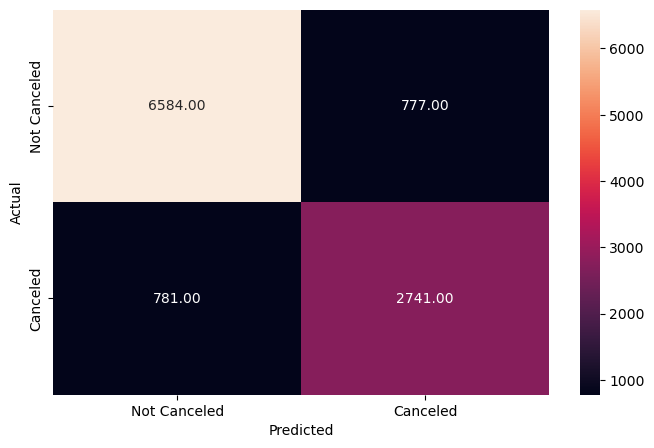

In [77]:
# Checking performance on the test data
y_pred_test5 = rf_estimator_tuned.predict(X_test)
metrics_score(y_test, y_pred_test5)

**Observations:**
- **The f1 score is very similar for random forest with default parameters and tuned random forest models. Both models can be potential models for identifying** the booking which is going to get canceled.

-----

**One of the drawbacks of ensemble models is that we lose the ability to obtain an interpretation of the model. We cannot observe the decision rules for random forests the way we did for decision trees. So, let's just check the feature importance of the model.**

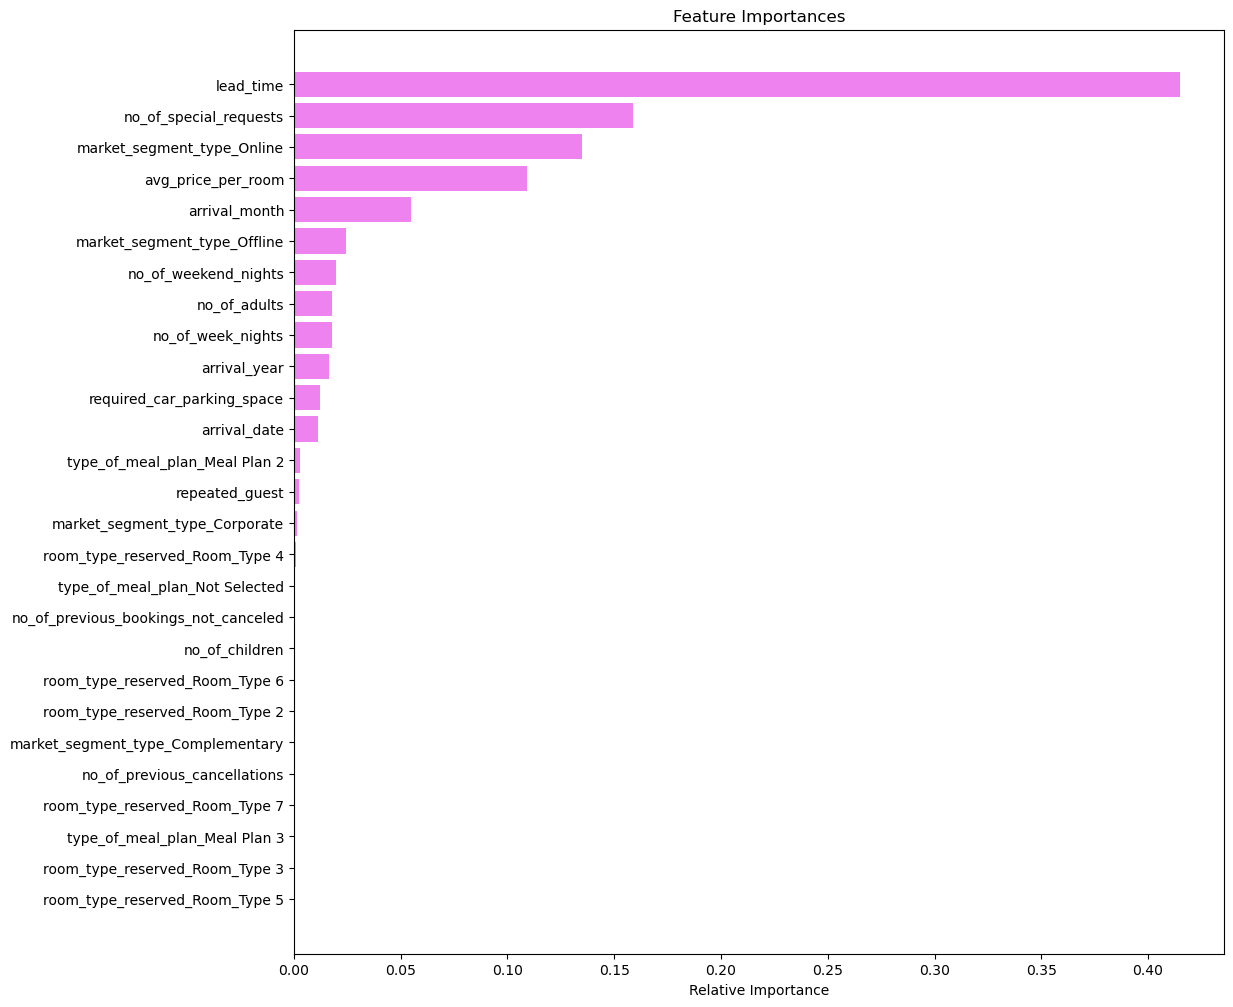

In [78]:
importances = rf_estimator_tuned.feature_importances_

indices = np.argsort(importances)

feature_names = list(X.columns)

plt.figure(figsize = (12, 12))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

**Observations:**
- Similar to the decision tree model, **lead_time, no_of_special_requests, market_segment_type_Online, and avg_price_per_room are the top four features** that help distinguish between canceled and not canceled bookings.

- Similar to the decision tree, **the random forest also giving some importance to other variables like arrival_month, market_segment_type_Online, no_of_weekend_nights, no_of_adults, no_of_week_nights, arrival_year as well.** 

## Recommendations:

1. The lead time can play a key role in identifying if a booking will be canceled or not. We observed that the bookings where a customer has made the booking well before the date of arrival are more likely to be canceled. 
    * The hotel can contact such customers before the arrival date for re-confirmation of their bookings. The response given by the customer will give the hotel ample time to re-sell the room or make preparations for the customer's requests.


2. Stricter cancellation policies can be adopted by the hotel. 
    * The bookings where the average price per room is high, and there were special requests associated should not get a full refund as the loss of resources will be high in these cases.
    * Ideally the cancellation policies should be consistent across all market segments but as noticed in our analysis, high percentage of bookings done online are canceled. The booking canceled online should yield less percentage of refund to the customers.
    
The refunds, cancellation fees, etc. should be highlighted on the website / app before a customer confirms their booking to safeguard guest's interest.

3. The length of stay at the hotel can be restricted.
    * We saw in our analysis that bookings, where the total length of stay was more than 5 days, had higher chances of getting canceled.
    * Hotel can allow bookings up to 5 days only and then customers should be asked to re-book if they wish to stay longer. These policies can be relaxed for corporate and Aviation market segments. For other market segments, the process should be fairly easy to not hamper their experience with the hotel.

Such restrictions can be strategized by the hotel to generate additional revenue.


4. In December and January, the cancellation to non-cancellation ratio is low. Customers might travel to celebrate Christmas and New Year. The hotel should ensure that enough human resources are available to cater to the needs of the guests.


5. October and September saw the highest number of bookings but also high number of cancellations. This should be investigated further by the hotel. 


6. Post-booking interactions can be initiated with the customers.

    * Post-booking interactions will show the guests the level of attention and care they would receive at the hotel. 
    * To give guests a personalized experience, information about local events, nearby places to explore, etc. can be shared from time to time.


7. Improving the experience of repeated customers.

    * Our analysis shows that there are very few repeat customers and the cancellation among them is very less which is a good indication as repeat customers are important for the hospitality industry as they can help in spreading the word of mouth and require almost no marketing cost. Attracting new customers is tedious and costs more as compared to a repeated guest.
    * A loyalty program that offers special discounts, access to services in hotels, etc. for these customers can help in improving their experience.